In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Trainee\Documents\Hallo_DPP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_link = "nikitamanaenkov/psychiatric-motor-activity-dataset"  # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 9.75M/9.75M [00:00<00:00, 12.5MB/s]

Extracting files...


Loading dataset from C:\Users\Trainee\.cache\kagglehub\datasets\nikitamanaenkov\psychiatric-motor-activity-dataset\versions\1 to ../data/raw\psychiatric-motor-activity-dataset
Moving file: C:\Users\Trainee\.cache\kagglehub\datasets\nikitamanaenkov\psychiatric-motor-activity-dataset\versions\1\adhd to c:\Users\Trainee\Documents\Hallo_DPP\notebooks\../data/raw\psychiatric-motor-activity-dataset
Moving file: C:\Users\Trainee\.cache\kagglehub\datasets\nikitamanaenkov\psychiatric-motor-activity-dataset\versions\1\adhd-info.csv to c:\Users\Trainee\Documents\Hallo_DPP\notebooks\../data/raw\psychiatric-motor-activity-dataset
Moving file: C:\Users\Trainee\.cache\kagglehub\datasets\nikitamanaenkov\psychiatric-motor-activity-dataset\versions\1\clinical to c:\Users\Trainee\Documents\Hallo_DPP\notebooks\../data/raw\psychiatric-motor-activity-dataset
Moving file: C:\Users\Trainee\.cache\kagglehub\datasets\nikitamanaenkov\psychiatric-motor-activity-dataset\versions\1\clinical-info.csv to c:\Users\Tra

In [4]:
files

['adhd',
 'adhd-info.csv',
 'clinical',
 'clinical-info.csv',
 'control',
 'control-info.csv',
 'depression',
 'depression-info.csv',
 'features.csv',
 'schizophrenia',
 'schizophrenia-info.csv']

In [6]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]))
df.head()

,number,gender,age,acc_time,days,adhd,add,bipolar,unipolar,anxiety,...,madrs,hads_a,hads_d,med,med_antidepr,med_moodstab,med_antipsych,med_anxiety_benzo,med_sleep,med_stimulants
0,adhd_1,1,40-49,16:00:00,6.0,1,0,1,0,1,...,26.0,12.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,adhd_2,1,50-67,10:54:00,6.8,1,0,0,1,0,...,11.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,adhd_3,2,30-39,15:28:00,7.2,1,0,1,0,0,...,6.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,adhd_5,2,17-29,14:24:00,5.9,1,1,1,0,1,...,28.0,10.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,adhd_8,1,30-39,12:00:00,4.3,1,0,1,0,1,...,19.0,17.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [7]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(45, 26)

'Description'

,count,mean,std,min,25%,50%,75%,max
gender,45.0,1.53,0.50,1.0,1.00,2.0,2.00,2.0
days,45.0,6.64,1.31,2.2,6.50,7.0,7.20,10.1
adhd,45.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
add,45.0,0.51,0.51,0.0,0.00,1.0,1.00,1.0
bipolar,45.0,0.36,0.48,0.0,0.00,0.0,1.00,1.0
unipolar,45.0,0.36,0.48,0.0,0.00,0.0,1.00,1.0
anxiety,45.0,0.40,0.50,0.0,0.00,0.0,1.00,1.0
substance,45.0,0.27,0.45,0.0,0.00,0.0,1.00,1.0
other,45.0,0.24,0.43,0.0,0.00,0.0,0.00,1.0
ct,45.0,0.58,0.50,0.0,0.00,1.0,1.00,1.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
number,object,0,45,"[adhd_91, adhd_59, adhd_3]"
gender,int64,0,2,"[1, 1, 1]"
age,object,0,4,"[17-29, 40-49, 30-39]"
acc_time,object,0,33,"[14:24:00, 16:00:00, 15:00:00]"
days,float64,0,23,"[5.5, 7.1, 6.6]"
adhd,int64,0,1,"[1, 1, 1]"
add,int64,0,2,"[1, 1, 0]"
bipolar,int64,0,2,"[0, 1, 1]"
unipolar,int64,0,2,"[1, 0, 0]"
anxiety,int64,0,2,"[1, 1, 1]"


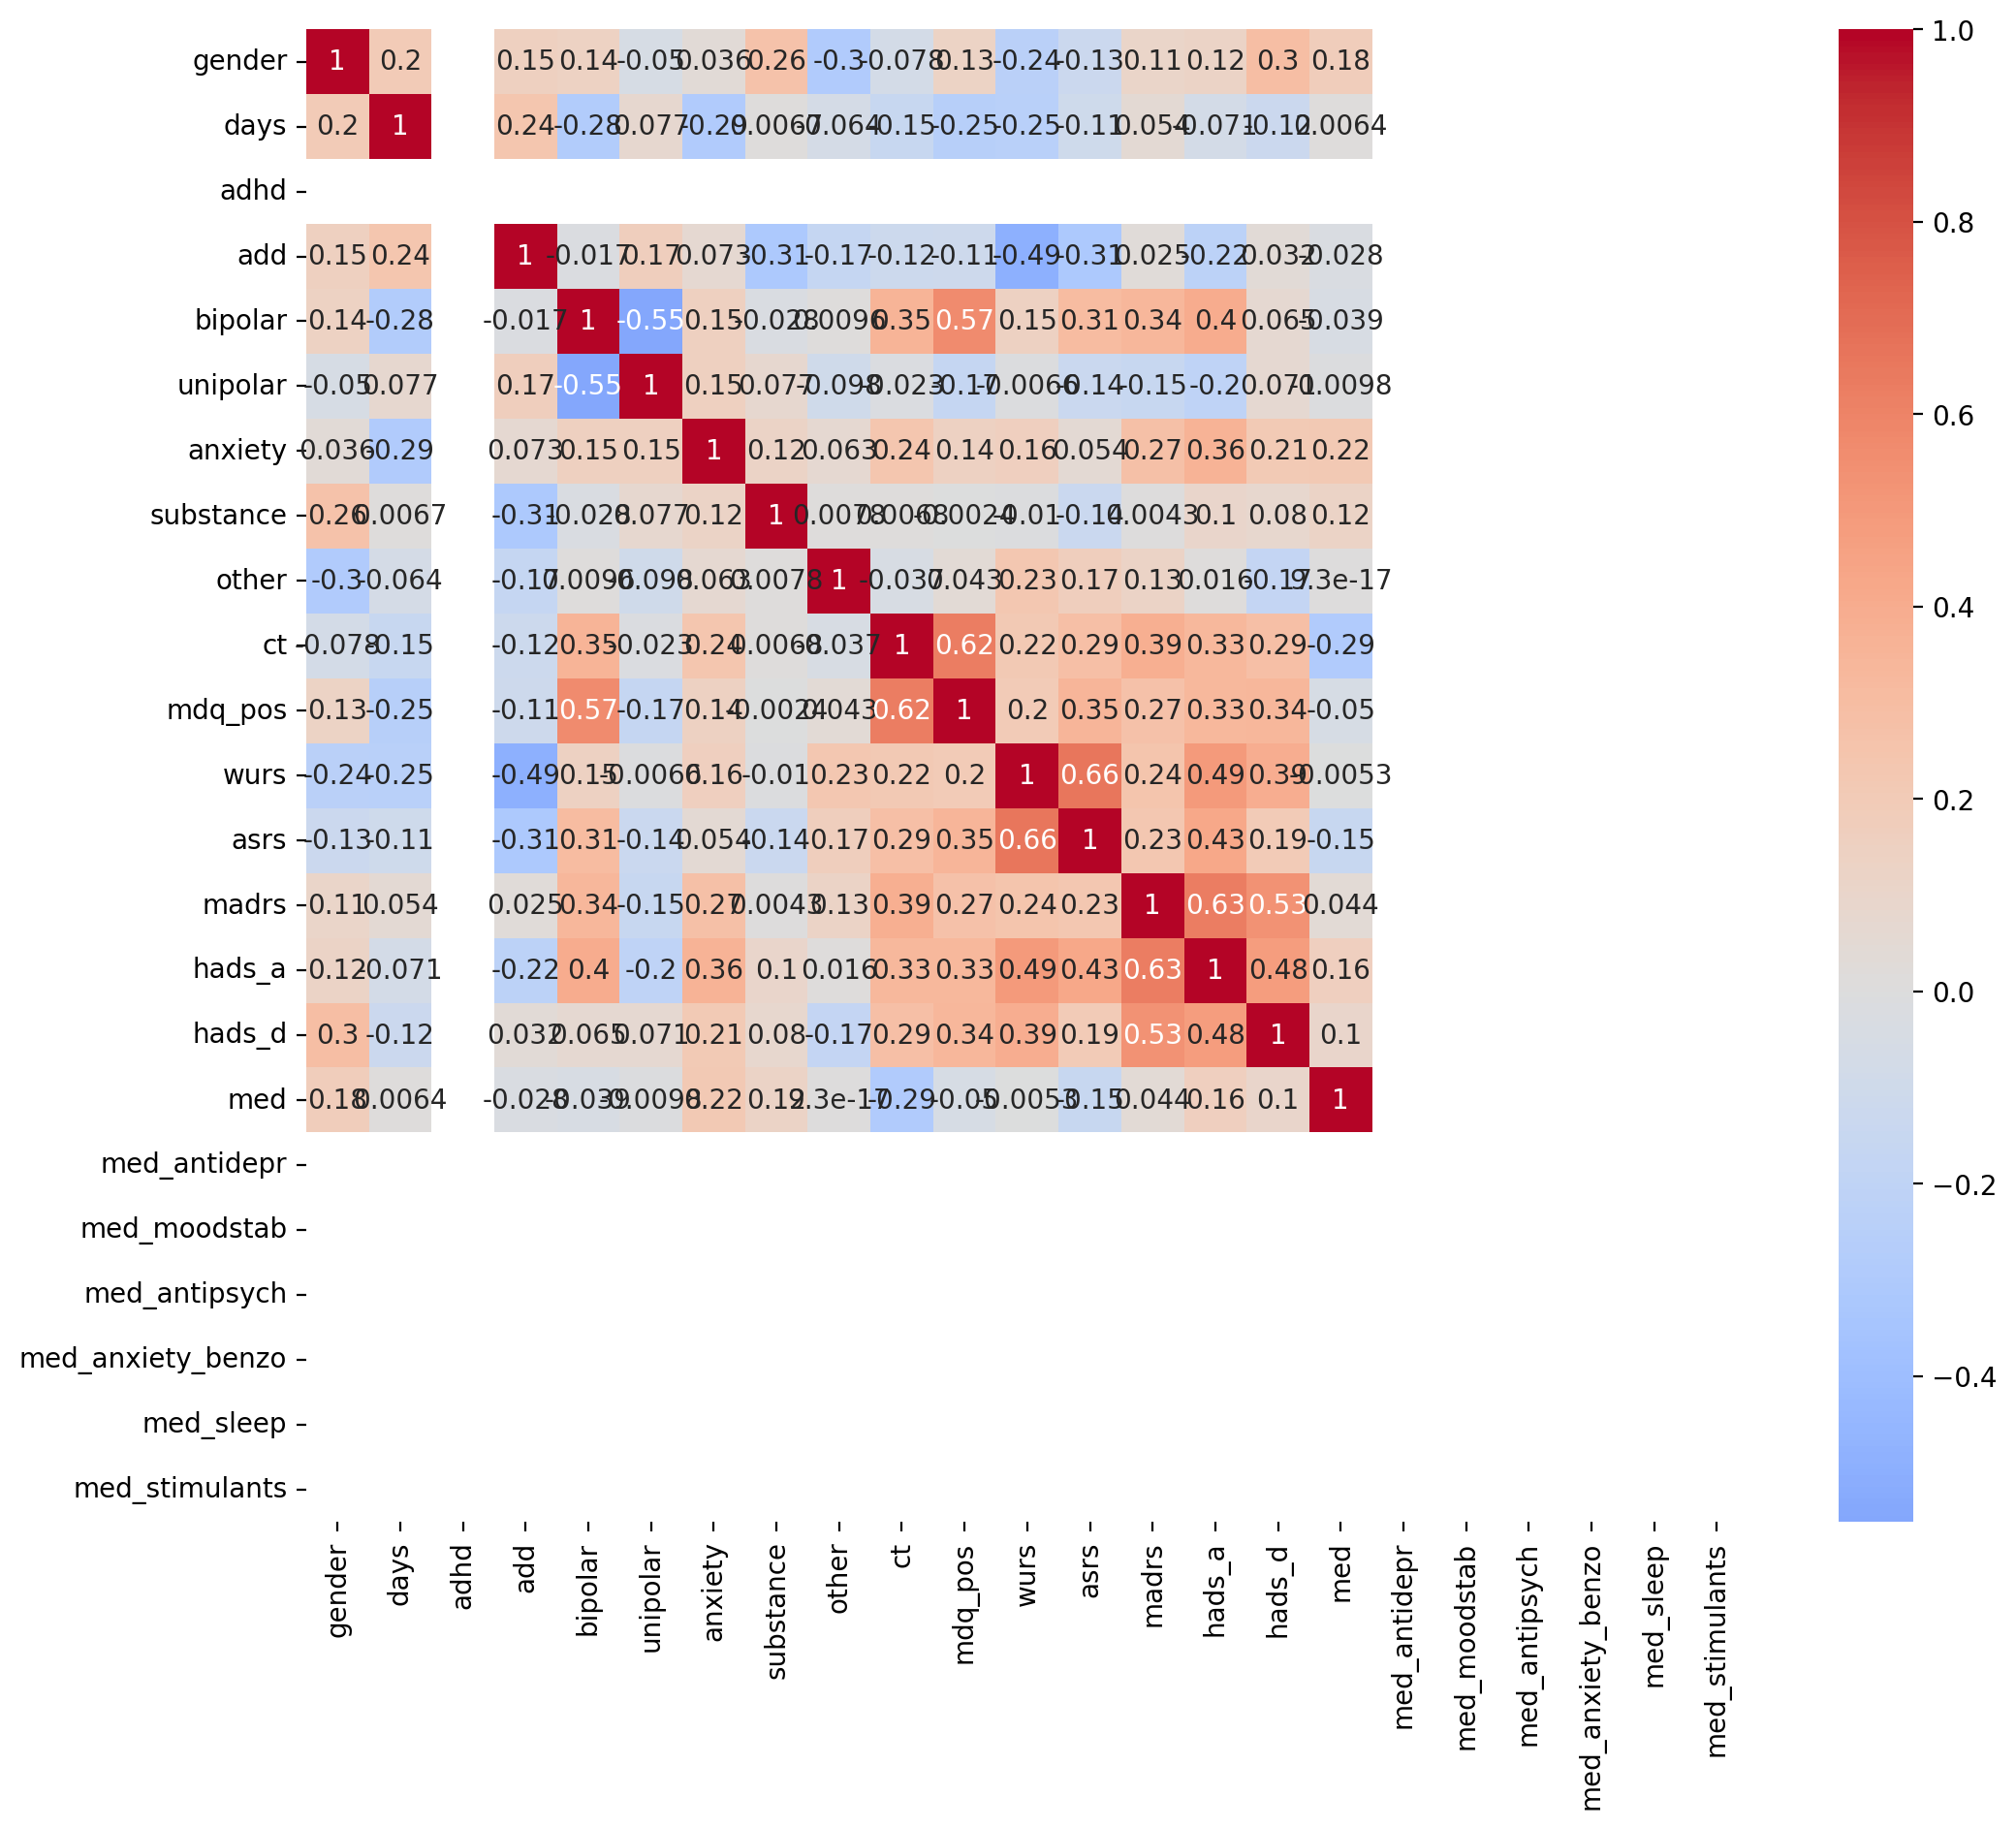

In [8]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);